In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
data=pd.read_csv('titanic.csv')

In [131]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [132]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


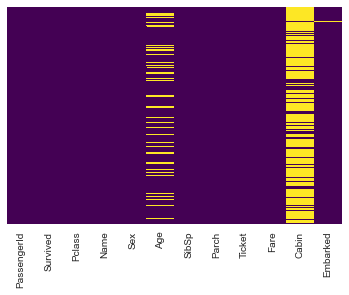

In [134]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

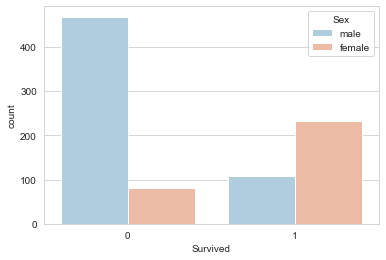

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

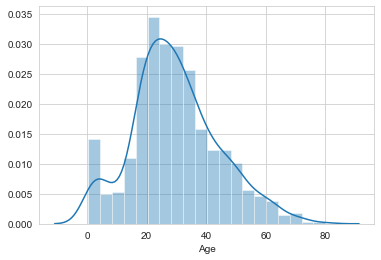

In [136]:
sns.distplot(data['Age'])

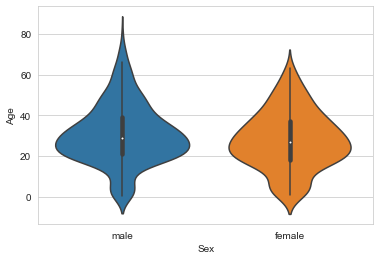

In [137]:
sns.violinplot(y = data['Age'], x = data['Sex'])

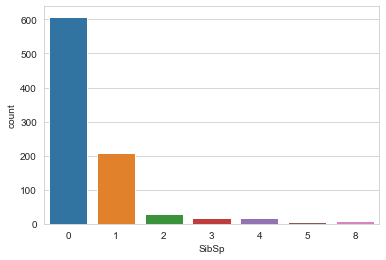

In [138]:
sns.countplot(x='SibSp',data=data)

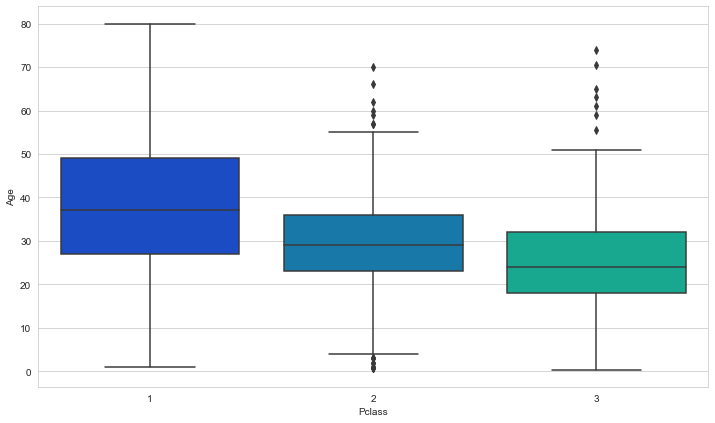

In [139]:
#data cleaning 
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [140]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1 :
            return 37
        elif Pclass == 2 :
            return 29
        else:
            return 24
       
    else:
            return Age

In [141]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

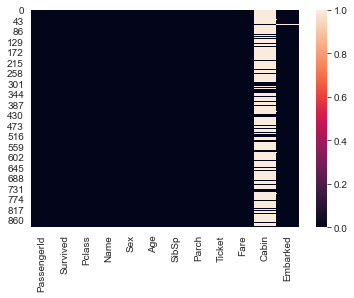

In [142]:
sns.heatmap(data.isnull())

In [143]:
data.drop('Cabin',axis=1,inplace=True)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [145]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [146]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [147]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [148]:
data = pd.concat([data,sex,embark],axis=1)

In [149]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [150]:
data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [151]:
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [157]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [160]:
for i in data.columns:
    data[i] = le.fit_transform(data[i].astype(str))
    

In [162]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,0,2,11,1,21,1,0,472,90,2,1,0,1
1,1,1,0,102,0,47,1,0,552,121,0,0,0,0
2,112,1,2,283,0,28,0,0,633,184,2,0,0,1
3,223,1,0,193,0,42,1,0,434,100,2,0,0,1
4,334,0,2,57,1,42,0,0,415,186,2,1,0,1


In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Survived',axis=1),data['Survived'], test_size=0.30,random_state=101)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [166]:
lr=LogisticRegression()

In [167]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,0,2,11,1,21,1,0,472,90,2,1,0,1
1,1,1,0,102,0,47,1,0,552,121,0,0,0,0
2,112,1,2,283,0,28,0,0,633,184,2,0,0,1
3,223,1,0,193,0,42,1,0,434,100,2,0,0,1
4,334,0,2,57,1,42,0,0,415,186,2,1,0,1


In [168]:
lr.fit(x_train,y_train)

C:\Users\Dell Laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
pred=lr.predict(x_test)
print(pred)

[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1]


In [172]:
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.7761194029850746


In [173]:
print (confusion_matrix(y_test,pred))

[[138  16]
 [ 44  70]]


In [174]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       154
           1       0.81      0.61      0.70       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [175]:
import joblib

In [176]:
joblib.dump(lr,"titanic_modal")

['titanic_modal']